In [2]:
#import necessary datasets  
import xarray as xr
from anemoi.datasets import open_dataset
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import cartopy
import cmocean
import cartopy.crs as ccrs

In [4]:
file_name = f'/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2013_surface.zarr'
ds_uwind_2013 = open_dataset(file_name, select = "Uwind_eastward")
file2 = f'/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2024_surface.zarr'
ds_2024 = open_dataset(file2, select = "Uwind_eastward")

In [18]:
def wind(ds_file, year, time_indx, cbar_title):
    fig,ax = plt.subplots(figsize = (8,10), subplot_kw={"projection": ccrs.NorthPolarStereo()})
    im = ax.scatter(ds_file.longitudes, ds_file.latitudes, c = ds_file[time_indx,0,0,:], s=2, cmap = cmocean.cm.speed, transform = ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, zorder = 1, edgecolor = "black")
    cax = fig.add_axes([ax.get_position().x1+0.025, ax.get_position().y0, 0.025, ax.get_position().height])
    cbar = fig.colorbar(im, ax=ax, cax=cax, extend = "both")
    cbar.ax.set_title(cbar_title, fontsize = 14)
    ax.set_title(f'+ {time_indx}h from {year} - 01.01T000:00:00')
    plt.show()

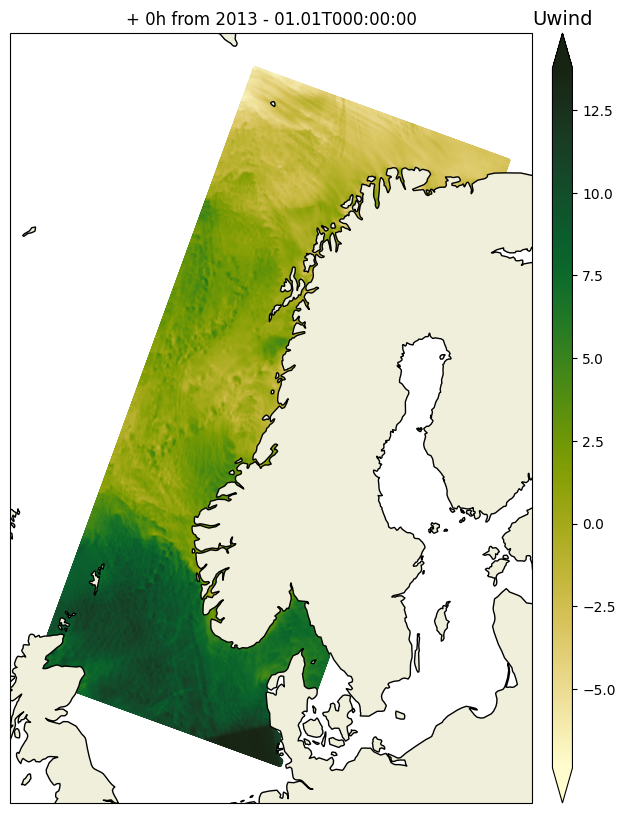

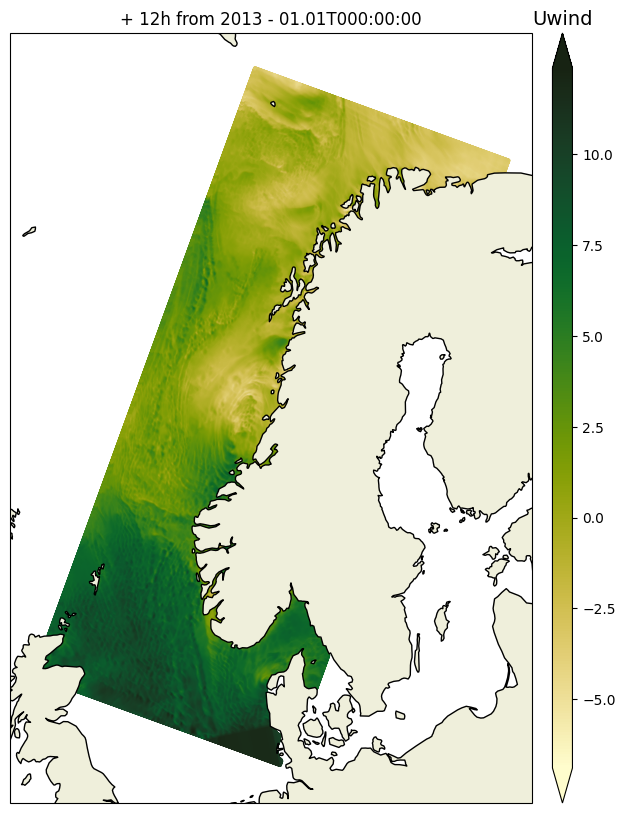

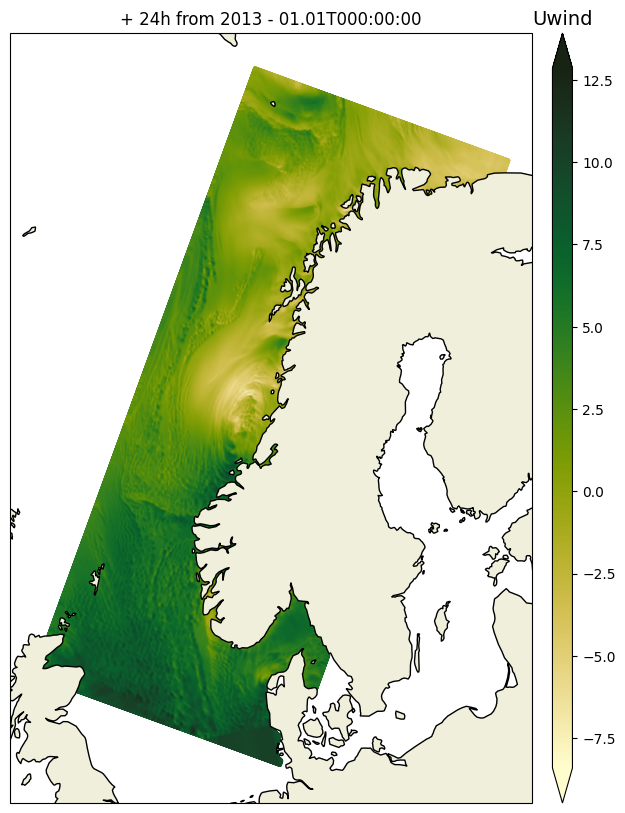

In [19]:
for time_indx in [0,12,24]:
    wind(ds_file=ds_uwind_2013, year = 2013, time_indx=time_indx, cbar_title="Uwind")

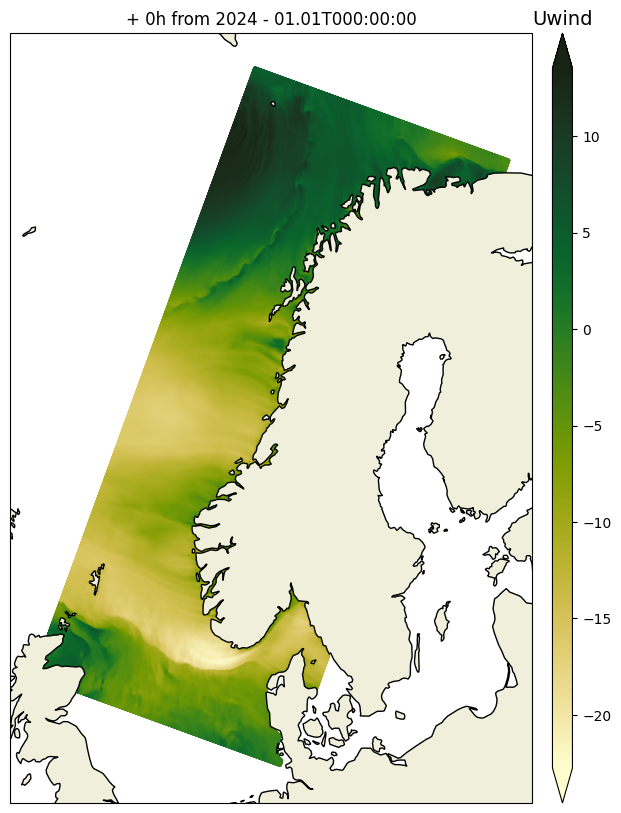

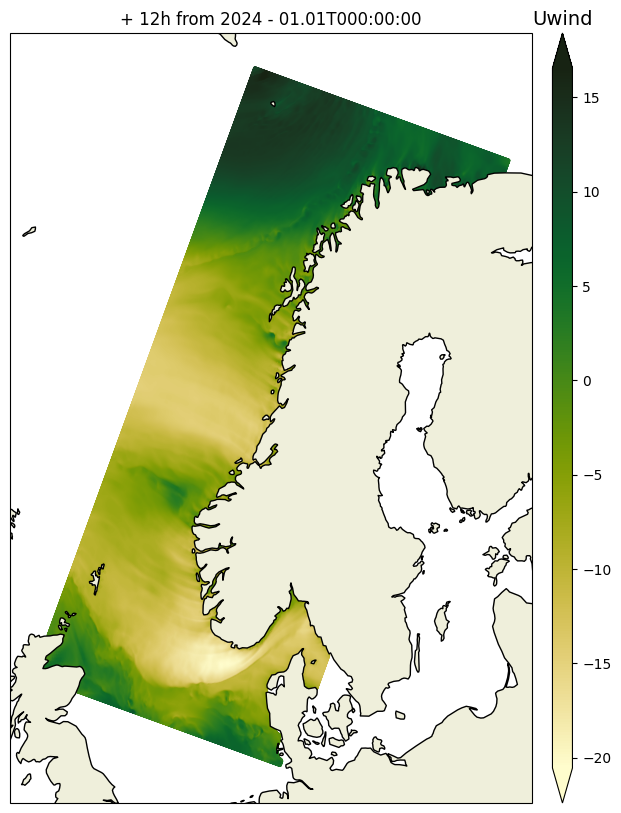

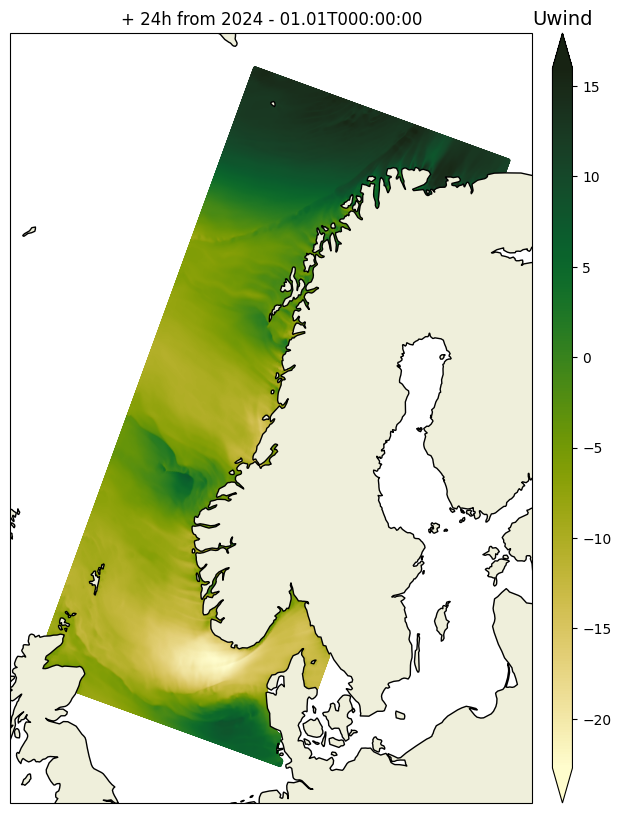

In [20]:
for time_indx in [0,12,24]:
    wind(ds_file=ds_2024, year = 2024, time_indx=time_indx, cbar_title="Uwind")

In [21]:
ds_vwind_2013 = open_dataset(file_name, select = "Vwind_northward") #u near the surface
ds_vwind_2024 = open_dataset(file2, select = "Vwind_northward")

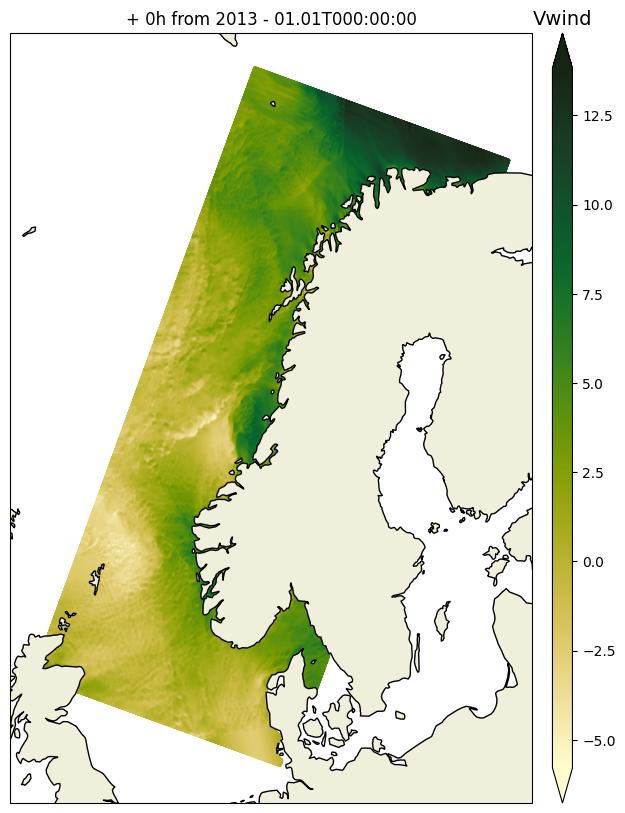

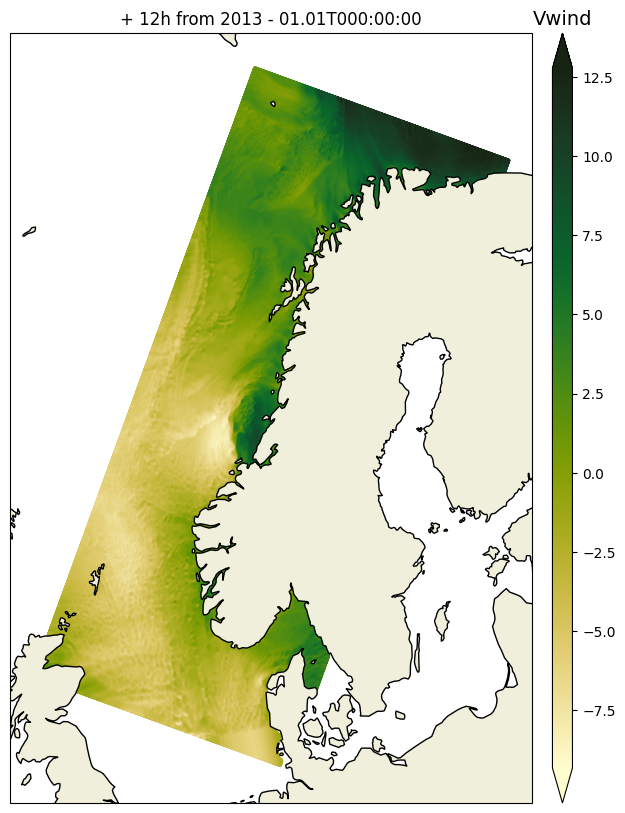

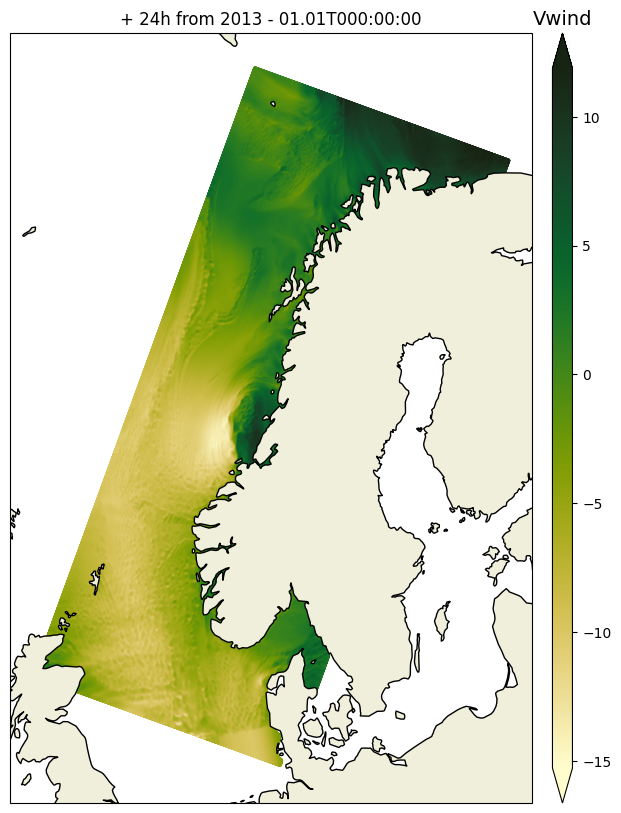

In [23]:
for time_indx in [0,12,24]:
    wind(ds_file=ds_vwind_2013, time_indx=time_indx, cbar_title="Vwind", year = 2013)


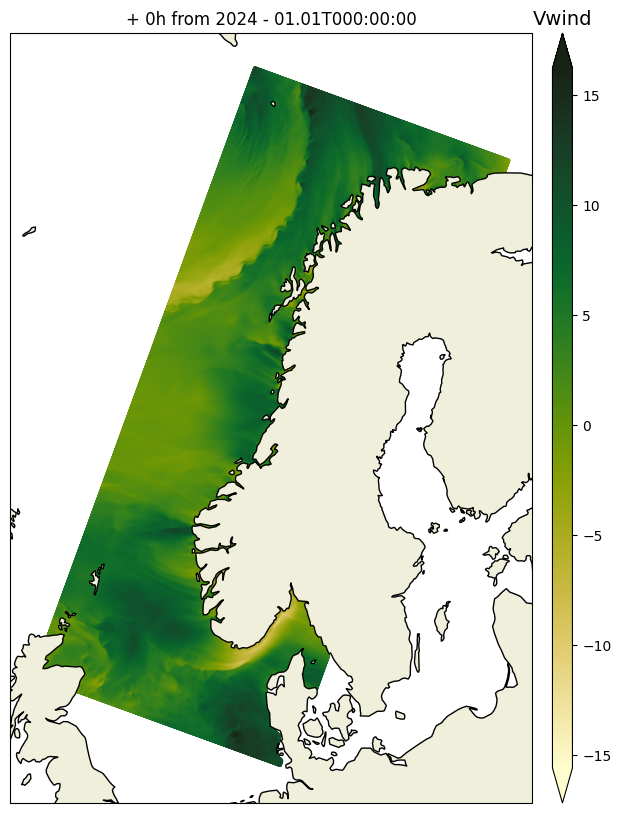

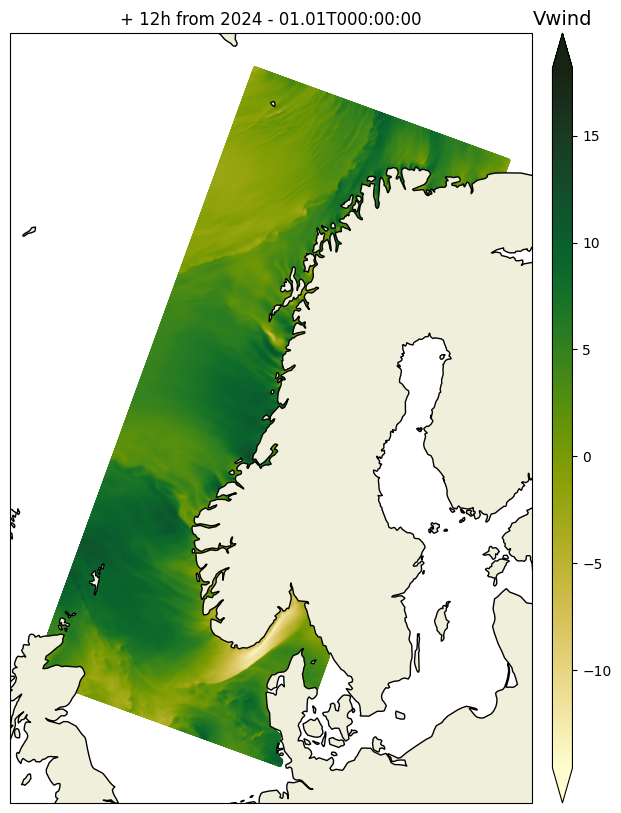

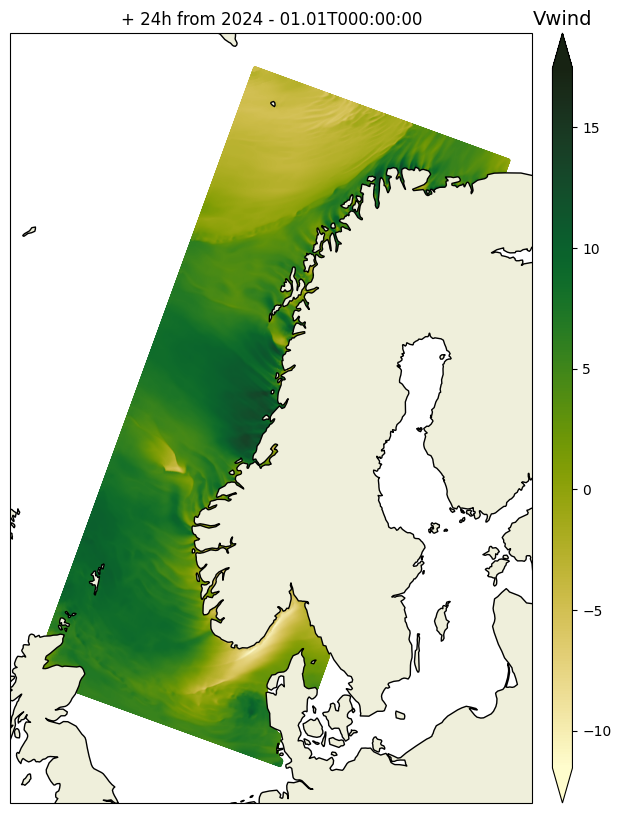

In [24]:
for time_indx in [0,12,24]:
    wind(ds_file=ds_vwind_2024, time_indx=time_indx, cbar_title="Vwind", year = 2024)